In [101]:
import pandas as pd
X_pos=pd.read_csv(r'C:\Users\karun\Desktop\csv_python\SNR_Labelled_Data_possnr.csv', sep=',',header=None)

In [102]:
import matplotlib.pyplot as plt

In [103]:
X_neg=pd.read_csv(r'C:\Users\karun\Desktop\csv_python\SNR_Labelled_Data_negsnr.csv', sep=',',header=None)

In [104]:
X_pos.iloc[:].head()

,0,1,2,3,4,5,6,7,8,9,...,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210
0,0.0873,0.0961,0.0849,0.0608,0.0649,0.0889,0.0721,0.0480,0.0576,0.0793,...,0.0299,0.0163,0.0111,0.0130,0.01410,0.00551,0.00802,0.0135,0.0160,1.0
1,0.0929,0.0905,0.1050,0.1110,0.1040,0.0961,0.0721,0.0536,0.0657,0.1000,...,0.0375,0.0176,0.0115,0.0135,0.00507,0.01020,0.00762,0.0117,0.0122,1.0
2,0.1090,0.1020,0.0833,0.0809,0.0801,0.0857,0.0761,0.0568,0.0504,0.0721,...,0.0289,0.0188,0.0106,0.0208,0.01700,0.01790,0.01100,0.0131,0.0159,1.0
3,0.0697,0.0705,0.0825,0.0905,0.0857,0.0833,0.0713,0.0584,0.0544,0.0721,...,0.0403,0.0147,0.0114,0.0183,0.01250,0.01190,0.00813,0.0170,0.0163,1.0
4,0.0777,0.0777,0.0769,0.0649,0.0697,0.0809,0.0689,0.0440,0.0368,0.0721,...,0.0354,0.0200,0.0134,0.0182,0.01410,0.01580,0.01370,0.0162,0.0148,1.0


In [105]:
frames = [X_pos, X_neg]
X_Complete = pd.concat(frames)

In [106]:
X_Complete.shape

(7560, 2211)

In [107]:
X_Complete = X_Complete.sample(frac=1).reset_index(drop=True)

In [108]:
X = X_Complete.iloc[:,:2210]

In [109]:
X.shape

(7560, 2210)

In [110]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2200,2201,2202,2203,2204,2205,2206,2207,2208,2209
0,0.0777,0.0873,0.0921,0.1010,0.0921,0.0809,0.0953,0.0945,0.0769,0.0761,...,0.01040,0.01420,0.01110,0.01550,0.01080,0.01020,0.00668,0.01010,0.00859,0.00801
1,0.0737,0.0657,0.0785,0.0785,0.0665,0.0825,0.0961,0.0785,0.0520,0.0512,...,0.00580,0.02170,0.02060,0.01150,0.01180,0.01110,0.01110,0.01190,0.00553,0.01540
2,0.0993,0.0833,0.0753,0.0697,0.0729,0.0713,0.0472,0.0641,0.0865,0.0793,...,0.00818,0.00406,0.00535,0.00502,0.00778,0.01560,0.02000,0.02260,0.02380,0.02290
3,0.1020,0.0865,0.0713,0.0865,0.0961,0.0809,0.0825,0.0665,0.0352,0.0440,...,0.02210,0.02100,0.01220,0.01220,0.00863,0.00664,0.00996,0.00992,0.01380,0.01280
4,0.0961,0.0969,0.0977,0.0961,0.0857,0.0665,0.0600,0.0592,0.0889,0.1450,...,0.01770,0.00897,0.01050,0.01270,0.01450,0.01570,0.00748,0.01120,0.00822,0.01420


In [111]:
Y_t = X_Complete.iloc[:,2210]

In [112]:
Y_t.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: 2210, dtype: float64

In [113]:
import numpy as np
Y = Y_t.apply(np.int64)

ValueError: cannot convert float NaN to integer

In [114]:
Y[1:15]

1     1
2     1
3     1
4     1
5     0
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    0
Name: 2210, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [117]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
from sklearn.neural_network import MLPClassifier

In [119]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10))

In [120]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [121]:
predictions = mlp.predict(X_test)

In [122]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[484 440]
 [520 446]]


In [123]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.48      0.52      0.50       924
          1       0.50      0.46      0.48       966

avg / total       0.49      0.49      0.49      1890



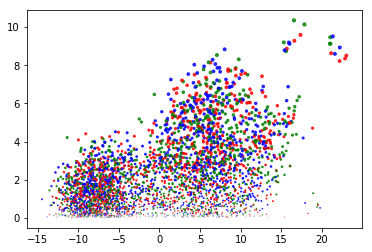

In [124]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1],principalDf.iloc[:, 1], c = ['red','green','blue'],alpha=0.8)

In [125]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(principalDf, Y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train_pca)
X_train_pca = scaler.transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10))
mlp.fit(X_train_pca,y_train_pca)
predictions = mlp.predict(X_test_pca)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_pca,predictions))
print(classification_report(y_test_pca,predictions))

[[425 535]
 [374 556]]
             precision    recall  f1-score   support

          0       0.53      0.44      0.48       960
          1       0.51      0.60      0.55       930

avg / total       0.52      0.52      0.52      1890



In [130]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

(7560, 2210)

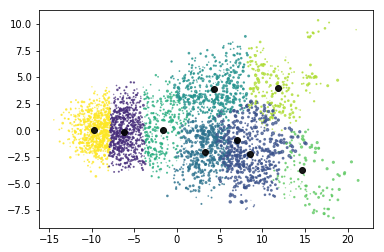

In [131]:
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1],principalDf.iloc[:, 2], c=y_kmeans, cmap='viridis',alpha=0.7)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', alpha=0.9);
X.shape

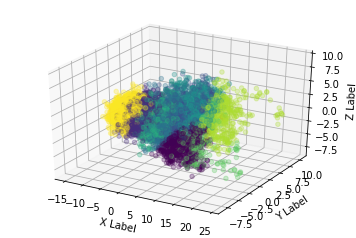

In [135]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1],principalDf.iloc[:, 2],c=y_kmeans, cmap='viridis',alpha=0.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.scatter(centers[:, 0], centers[:, 1], centers[:,2], c='RED', marker = 'D',alpha=1);

plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

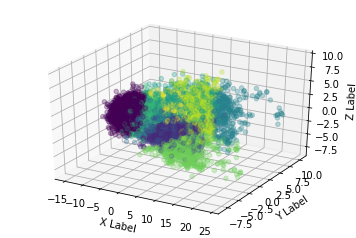

In [134]:
from sklearn.mixture import GMM
gmm = GMM(n_components=10).fit(principalDf)
labels = gmm.predict(principalDf)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1],principalDf.iloc[:, 2],c=labels, cmap='viridis',alpha=0.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.scatter(centers[:, 0], centers[:, 1], centers[:,2], c='RED', marker = 'D',alpha=1);

plt.show()